In [50]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv("../datasets/spam.csv")

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df = df[df["Message"].str.strip() != ""]

df['Category'] = df["Category"].map({"ham": 0, "spam": 1})

In [53]:
texts = df["Message"]
labels = df["Category"]

texts_train, texts_val, labels_train, labels_val = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((texts_train, labels_train))
val_dataset = tf.data.Dataset.from_tensor_slices((texts_val, labels_val))

In [55]:
max_tokens = 1000
output_sequence_length = 50

In [56]:
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=output_sequence_length,
    standardize='lower'
)

text_vectorizer.adapt(texts_train)

In [57]:
def preprocess_text(text, label):
    vectorized_text = text_vectorizer(text)
    return vectorized_text, label

train_dataset = train_dataset.map(preprocess_text, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_text, num_parallel_calls=tf.data.AUTOTUNE)

In [58]:
batch_size = 32

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_tokens, output_dim=128, input_length=output_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\Caio Lacerda\Desktop\APPS\Exercícios\venv_312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [75]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9007 - loss: 0.3177 - val_accuracy: 0.9623 - val_loss: 0.1101
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9776 - loss: 0.0657 - val_accuracy: 0.9839 - val_loss: 0.0628
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9857 - loss: 0.0497 - val_accuracy: 0.9812 - val_loss: 0.0694
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9785 - val_loss: 0.0803
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9937 - loss: 0.0246 - val_accuracy: 0.9830 - val_loss: 0.0711
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9950 - loss: 0.0171 - val_accuracy: 0.9821 - val_loss: 0.1139
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.9821 - val_loss: 0.0921
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accu

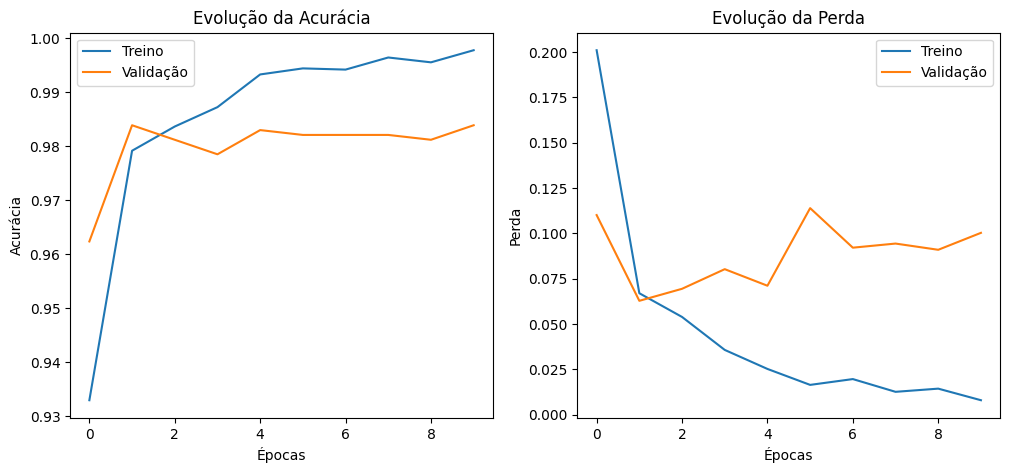

In [77]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Evolução da Acurácia')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Treino')
plt.plot(val_loss, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Evolução da Perda')

plt.show()


In [ ]:
from collections import Counter
import numpy as np

all_words = " ".join(texts_train).split()

word_counts = Counter(all_words)

total_words = sum(word_counts.values())
sorted_counts = np.cumsum(sorted(word_counts.values(), reverse=True))
threshold = 0.95 * total_words

max_tokens = np.searchsorted(sorted_counts, threshold)

print(f"Número ideal de tokens: {max_tokens}")

text_lengths = [len(text.split()) for text in texts_train]
print(f"Comprimento médio das frases: {np.mean(text_lengths)}")
print(f"Comprimento máximo das frases: {np.max(text_lengths)}")

Número ideal de tokens: 10216
